In [1]:
from tensorflow.keras.datasets import mnist

In [2]:
(train_images, train_labels),(test_images, test_labels) = mnist.load_data()

In [3]:
train_images.shape

(60000, 28, 28)

In [4]:
train_labels

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [5]:
test_images.shape

(10000, 28, 28)

In [6]:
len(test_labels)

10000

In [7]:
test_labels

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

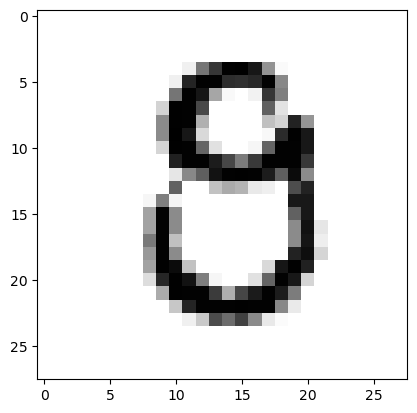

9


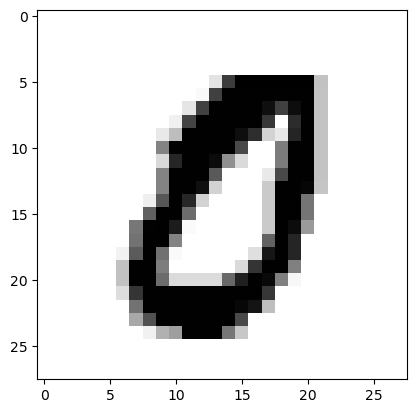

0


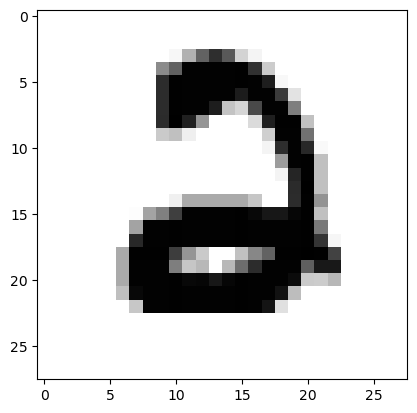

2


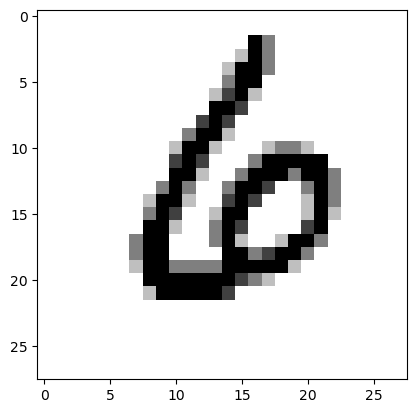

6


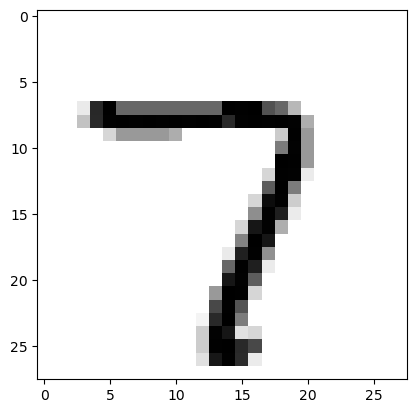

7


In [8]:
import matplotlib.pyplot as plt
for index in range(80,85):
    digit=train_images[index]
    label=train_labels[index]
    plt.imshow(digit, cmap=plt.cm.binary)
    plt.show()
    print(label)

Digit #: 9012


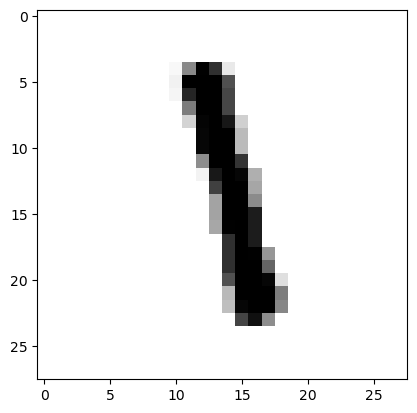

1


In [9]:
import matplotlib.pyplot as plt
index=int(input("Digit #:"))
digit=train_images[index]
label=train_labels[index]
plt.imshow(digit, cmap=plt.cm.binary)
plt.show()
print(label)

In [10]:
my_slice=train_images[10:100]
my_slice.shape

(90, 28, 28)

In [11]:
my_slice=train_images[10:100, 0:28, 0:28]
my_slice.shape

(90, 28, 28)

Digit #: 9012


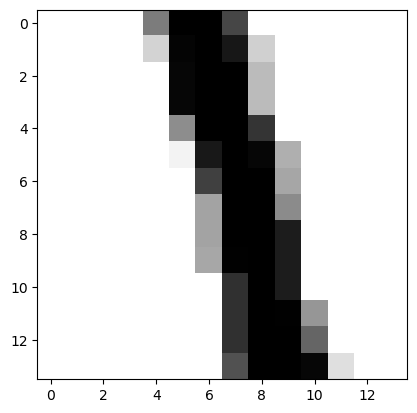

1


In [14]:
import matplotlib.pyplot as plt
index=int(input("Digit #:"))
digit=train_images[index, 7:-7, 7:-7]
label=train_labels[index]
plt.imshow(digit, cmap=plt.cm.binary)
plt.show()
print(label)

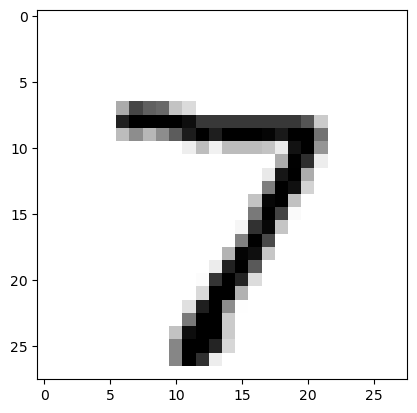

7


In [15]:
import matplotlib.pyplot as plt
digit=test_images[0]
label=test_labels[0]
plt.imshow(digit, cmap=plt.cm.binary)
plt.show()
print(label)

In [16]:
from tensorflow import keras
from tensorflow.keras import layers
model=keras.Sequential([
    layers.Dense(512,activation="relu"),
    layers.Dense(10,activation="softmax")
])

In [17]:
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

In [18]:
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255
test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype("float32") / 255

In [19]:
model.fit(train_images, train_labels, epochs=5, batch_size=128)

Epoch 1/5
469/469 [==============================] - 2s 5ms/step - loss: 0.2600 - accuracy: 0.9246
Epoch 2/5
469/469 [==============================] - 2s 5ms/step - loss: 0.1052 - accuracy: 0.9691
Epoch 3/5
469/469 [==============================] - 2s 5ms/step - loss: 0.0694 - accuracy: 0.9791
Epoch 4/5
469/469 [==============================] - 2s 5ms/step - loss: 0.0504 - accuracy: 0.9845
Epoch 5/5
469/469 [==============================] - 2s 5ms/step - loss: 0.0374 - accuracy: 0.9882


In [20]:
test_digits = test_images[0:10]
predictions = model.predict(test_digits)
predictions[0]

1/1 [==============================] - 0s 41ms/step


array([1.5530232e-09, 7.8556484e-12, 2.6894750e-06, 2.5148211e-06,
       2.7449714e-12, 2.9848646e-09, 2.4405455e-14, 9.9999201e-01,
       1.8697126e-09, 2.7114272e-06], dtype=float32)

In [21]:
predictions[0].argmax()

7

In [22]:
predictions[0][7]

0.999992

In [23]:
test_labels[0]

7

In [24]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f"test_acc: {test_acc}")

313/313 [==============================] - 0s 1ms/step - loss: 0.0723 - accuracy: 0.9792
test_acc: 0.979200005531311
